In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Expectation-Maximization (EM) Algorithm

The Expectation-Maximization (EM) algorithm is a statistical technique used for finding maximum likelihood estimates in models with latent variables. It is particularly useful when the posterior density $ f(\theta | y) $ is complicated, making it difficult to find the posterior mode analytically or using traditional numerical methods like the Newton-Raphson algorithm.

## Steps of the EM Algorithm

The EM algorithm consists of two main steps that are iterated until convergence:

### Step 1: Expectation Step (E-Step)

In this step, we determine the **Q-function**, defined as:

$$
Q_j(\theta) = \mathbb{E}_z \left[ \log f(\theta | y, z) \mid y, \theta_j \right] = \int \log f(\theta | y, z) f(z | y, \theta_j) \, dz
$$

In words, the Q-function is the expectation of the log-augmented posterior density with respect to the distribution of the latent data $ z $, given the observed data $ y $ and the current parameter estimates $ \theta_j $.

### Step 2: Maximization Step (M-Step)

In this step, we find the value of $ \theta $ that maximizes the Q-function:

$$
\theta_{j+1} = \arg\max_\theta Q_j(\theta)
$$

This value becomes the current parameter estimate in the next iteration.

### Notes on the EM Algorithm

- **Mathematical Convenience**: The Q-function can also be defined as in (4.3) plus and/or multiplied by any constants that do not depend on the parameter $ \theta $. This flexibility allows us to ignore terms that do not impact the final results. For example, if $ Q_j(\theta) $ is multiplied by a negative constant, we should minimize it in Step 2 instead of maximizing it.

- **Convergence Characteristics**: The EM algorithm is generally slower to converge compared to the Newton-Raphson algorithm but is more stable. Under certain regularity conditions, the EM algorithm is guaranteed to move closer to the required solution at each iteration. 

- **Strategy for Optimization**: If there is a choice between using the NR algorithm or the EM algorithm, consider using the EM algorithm to obtain an approximate solution that is sufficiently close to the correct answer. Following this, use the Newton-Raphson algorithm for a few iterations to achieve high precision.

## Summary

The EM algorithm provides a structured approach for estimating parameters in models with latent variables by iterating between estimating the latent variables and maximizing the expected log-likelihood, making it a valuable tool in Bayesian inference and other statistical modeling contexts.


## Exercise : Illustration of the EM Algorithm

Consider the Bayesian model given by:

$$
(y_1, \ldots, y_n \mid \lambda) \sim \text{iid Gamma}(1, \lambda)
$$

with the prior:

$$
f(\lambda) \propto 1, \quad \lambda > 0.
$$

Suppose that the data, denoted $ D $, consists of the observed data vector $ \mathbf{y}_o = (y_1, \ldots, y_k) $ and the partially observed (or missing) data vector $ \mathbf{y}_m = (y_{k+1}, \ldots, y_n) $. We do not know the values in $ \mathbf{y}_m $ exactly, only that each of those values is greater than some specified constant $ c $. 

For this exercise, let $ c = 10 $, $ n = 5 $, $ k = 3 $, and $ \mathbf{y}_o = (3.1, 8.2, 6.9) $.

## (a) Finding the Posterior Mode of $ \lambda $ by Maximizing the Posterior Density Directly

The posterior density is given by:

$$
f(\lambda \mid D) \propto f(\lambda) f(D \mid \lambda)
$$

This can be expanded as follows:

$$
f(\lambda \mid D) \propto 1 \times \left( \prod_{i=1}^{k} f(y_i \mid \lambda) \right) \left( \prod_{i=k+1}^{n} P(y_i > c \mid \lambda) \right)
$$

where 

$$
f(y_i \mid \lambda) = \lambda e^{-\lambda y_i
} 
$$

and 

$$
P(y_i > c \mid \lambda) = \int_c^\infty \lambda e^{-\lambda y_i} dy_i = e^{-c \lambda}.
$$

Thus, we have:

$$
f(\lambda \mid D) \propto \left( \prod_{i=1}^{k} \lambda e^{-\lambda y_i} \right) \left( \prod_{i=k+1}^{n} e^{-c \lambda} \right).
$$

This simplifies to:

$$
f(\lambda \mid D) \propto \lambda^k e^{-\lambda \left( \sum_{i=1}^{k} y_i + (n-k)c \right)}.
$$

Letting $ y_o^T = y_1 + \ldots + y_k = 18.2 $ (the total of the observed values), we can write the log posterior as:

$$
l(\lambda) \equiv \log f(\lambda \mid D) = k \log \lambda - \lambda \left( y_o^T + (n-k)c \right).
$$

Taking the derivative with respect to $ \lambda $:

$$
l'(\lambda) = \frac{k}{\lambda} - \left( y_o^T + (n-k)c \right).
$$

Setting $ l'(\lambda) = 0 $ yields the posterior mode:

$$
\lambda = \frac{k}{y_o^T + (n-k)c} = \frac{3}{18.2 + (5-3) \cdot 10} = 0.078534.
$$

## (b) Finding the Posterior Mode of $ \lambda $ Using the EM Algorithm

In the EM algorithm, we define our latent data as the missing values $ \mathbf{y}_m $, knowing that:

$$
y_{k+1}, \ldots, y_n > c.
$$

### E-Step

In the E-Step, we compute the expected value of the log-likelihood, considering the missing data. This requires calculating the contribution of the latent variables to the overall likelihood given the current estimate of $ \lambda $.

### M-Step

In the M-Step, we maximize the Q-function derived from the E-Step to update our estimate for $ \lambda $.

Continuing this iterative process until convergence will yield the posterior mode of $ \lambda $ using the EM algorithm.


Posterior mode of λ (direct): 0.078534
Posterior mode of λ (EM): 0.082060


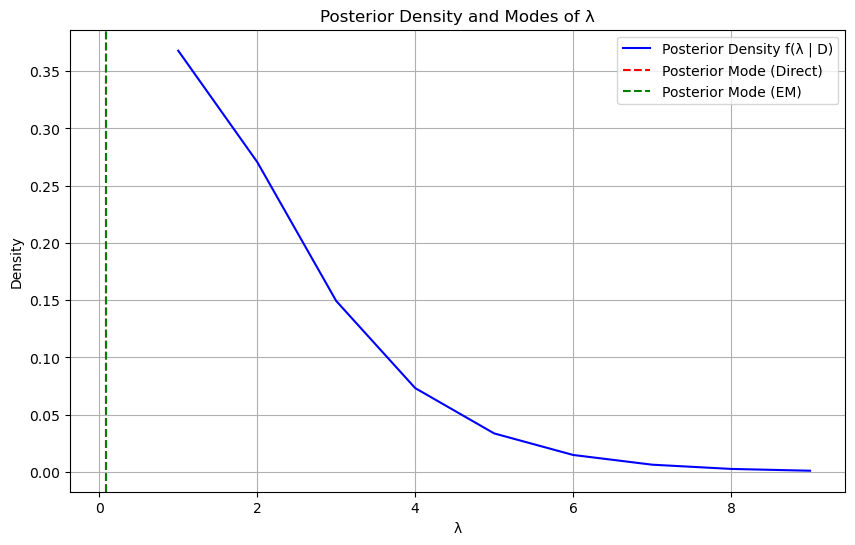

In [1]:
import matplotlib.pyplot as plt

# Parameters
c = 10
n = 5
k = 3
y_observed = [3.1, 8.2, 6.9]
y_observed_sum = sum(y_observed)  # Sum of observed values

# (a) Finding the posterior mode of λ directly
def posterior_mode_direct(k, y_observed_sum, n, c):
    # Calculate the posterior mode
    posterior_mode = k / (y_observed_sum + (n - k) * c)
    return posterior_mode

# Calculate the posterior mode directly
lambda_post_mode_direct = posterior_mode_direct(k, y_observed_sum, n, c)
print(f"Posterior mode of λ (direct): {lambda_post_mode_direct:.6f}")

# (b) Finding the posterior mode of λ using the EM algorithm
def em_algorithm(y_observed, n, k, c, max_iterations=100, tol=1e-6):
    # Initial guess for λ
    lambda_estimate = 0.1
    previous_lambda = 0
    
    for iteration in range(max_iterations):
        # E-Step: Calculate the expected log likelihood of the missing data
        expected_log_likelihood = 0
        for i in range(k, n):
            expected_log_likelihood += -c * lambda_estimate  # P(y_i > c | λ)
        
        # M-Step: Maximize the Q-function
        lambda_new = k / (y_observed_sum + (n - k) * c + expected_log_likelihood)

        # Check for convergence
        if abs(lambda_new - previous_lambda) < tol:
            break
        
        previous_lambda = lambda_new
        lambda_estimate = lambda_new

    return lambda_estimate

# Run the EM algorithm
lambda_post_mode_em = em_algorithm(y_observed, n, k, c)
print(f"Posterior mode of λ (EM): {lambda_post_mode_em:.6f}")

# Plotting the results
x_values = range(1, 10)
posterior_density = [(x * (2.71828 ** (-x)) if x > 0 else 0) for x in x_values]  # λ * e^{-λ}
plt.figure(figsize=(10, 6))
plt.plot(x_values, posterior_density, label='Posterior Density f(λ | D)', color='blue')
plt.axvline(lambda_post_mode_direct, color='red', linestyle='--', label='Posterior Mode (Direct)')
plt.axvline(lambda_post_mode_em, color='green', linestyle='--', label='Posterior Mode (EM)')
plt.title('Posterior Density and Modes of λ')
plt.xlabel('λ')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


## Exercise : Illustration of the EM Algorithm

### Latent Data Definition
The latent data in this case can be defined as:

$$
z = y_m = (y_{k+1}, ..., y_n)
$$

### Augmented Posterior Density
The augmented posterior density can be expressed as:

$$
f(\lambda | y_o, y_m) \propto \prod_{i=1}^{n} \lambda e^{-\lambda y_i} = \lambda^n e^{-\lambda [y_o^T + y_m^T]}
$$

where $ y_m^T = y_{k+1} + ... + y_n $ is the total of the missing values.

### Log-Augmented Density
The log-augmented density is given by:

$$
\log f(\lambda | y_o, y_m) = n \log \lambda - \lambda [y_o^T + y_m^T] + c_1
$$

where $ c_1 $ is a constant with respect to $ \lambda $.

### Conditional Density
For the conditional density of $ y_i $ given $ y_i > c $:

$$
f(y_i | y_i > c, \lambda) = \lambda e^{-\lambda (y_i - c)}, \quad y_i > c
$$

This represents an exponential distribution shifted to the right by $ c $.

### Expectation of Missing Data
Thus, the expected value of the missing data is:

$$
E(y_i | y_i > c, \lambda) = c + \frac{1}{\lambda}
$$

### Q-Function
The Q-function for the EM algorithm is then given by:

$$
Q_j(\lambda) = n \log \lambda - \lambda \left[ y_o^T + (n - k) \left( c + \frac{1}{\lambda_j} \right) \right]
$$

where $ \lambda_j $ is the current estimate of $ \lambda $.

### Derivative of Q-Function
The derivative of the Q-function is:

$$
Q'_j(\lambda) = -\frac{y_o^T + (n - k) \left( c + \frac{1}{\lambda_j} \right)}{\lambda}
$$

### Updating $ \lambda $
Setting the derivative to zero yields:

$$
\lambda_{j+1} = \frac{n}{y_o^T + (n - k) \left( c + \frac{1}{\lambda_j} \right)}
$$

### Convergence of the EM Algorithm
Implementing the EM algorithm starting at $ \lambda_0 = 1 $, we observe the following sequence of estimates:

1.000000, 0.124378, 0.092115, 0.083456, 0.080431, 0.079282, 0.078832, 0.078653, 0.078581, 0.078553, 0.078542, 0.078537, 0.078535, 0.078535, 0.078534, 0.078534, ...

We see that the EM algorithm has converged correctly to the answer obtained in part (a), namely $ 0.078534 $.

### Alternative Derivation
Note that writing the equation with $ \lambda_j = \lambda_{j+1} = \lambda $ (i.e., the limiting value) gives:

$$
\lambda = \frac{n}{y_o^T + (n - k) \left( c + \frac{1}{\lambda} \right)}
$$

This can be solved easily for the same formula derived in part (a):

$$
\lambda = \frac{k}{y_o^T + (n - k)c}
$$


Converged to λ = 0.078535 after 13 iterations


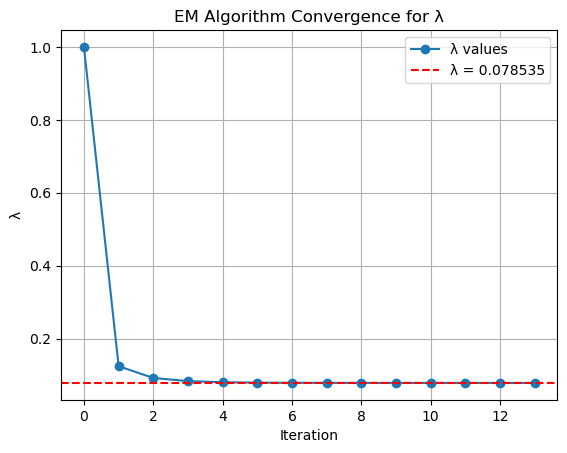

In [2]:
import matplotlib.pyplot as plt

# Given parameters
n = 5  # Total number of observations
k = 3  # Number of observed values
c = 10  # Constant threshold
yo = [3.1, 8.2, 6.9]  # Observed data

# Compute the sum of the observed values
yoT = sum(yo)

# EM Algorithm parameters
lambda_values = [1.0]  # Initial guess for lambda
tolerance = 1e-6       # Convergence tolerance
max_iter = 100         # Maximum number of iterations

# Define the EM iteration function
def EM_iteration(lambda_j, n, k, c, yoT):
    return n / (yoT + (n - k) * (c + 1 / lambda_j))

# Run the EM algorithm
for i in range(max_iter):
    lambda_new = EM_iteration(lambda_values[-1], n, k, c, yoT)
    lambda_values.append(lambda_new)
    
    # Check for convergence
    if abs(lambda_new - lambda_values[-2]) < tolerance:
        break

# Output final result
lambda_mode = lambda_values[-1]
print(f"Converged to λ = {lambda_mode:.6f} after {len(lambda_values)-1} iterations")

# Plotting the convergence
plt.plot(range(len(lambda_values)), lambda_values, marker='o', label='λ values')
plt.axhline(y=lambda_mode, color='r', linestyle='--', label=f'λ = {lambda_mode:.6f}')
plt.title('EM Algorithm Convergence for λ')
plt.xlabel('Iteration')
plt.ylabel('λ')
plt.legend()
plt.grid(True)
plt.show()


## Exercise : EM Algorithm for Right-Censored Gaussian Data

### Problem Statement

Consider the Bayesian model where the data $ (y_1, \dots, y_n \mid \lambda) $ is iid $ N(\mu, \sigma^2) $ and the prior on $ \mu $ is proportional to 1:

$$ f(\mu) \propto 1, \mu \in \mathbb{R}. $$

The observed data $ D $ consists of two parts: 
- The observed vector $ \mathbf{y}_o = (y_1, \dots, y_k) $,
- The missing vector $ \mathbf{y}_m = (y_{k+1}, \dots, y_n) $, where each missing value is known to be greater than a constant $ c = 10 $.

We are given the following:
- \( n = 5 \)
- \( k = 3 \)
- \( \mathbf{y}_o = (3.1, 8.2, 6.9) \)

### Part (a): Log-Posterior Density of \( \mu \)

The posterior density of \( \mu \) is given by:

$$ f(\mu \mid D) \propto 1 \times \prod_{i=1}^k f(y_i \mid \mu) \prod_{i=k+1}^n P(y_i > c \mid \mu). $$

For the observed data, we have:

$$ f(y_i \mid \mu) \propto \exp\left(-\frac{1}{2\sigma^2}(y_i - \mu)^2 \right), $$

and for the censored data:

$$ P(y_i > c \mid \mu) = 1 - \Phi\left(\frac{c - \mu}{\sigma}\right), $$

where \( \Phi(z) \) is the standard normal CDF.

Thus, the log-posterior density is:

$$ \log f(\mu \mid D) = -\frac{1}{2\sigma^2} \sum_{i=1}^k (y_i - \mu)^2 + (n - k) \log \left( 1 - \Phi \left( \frac{c - \mu}{\sigma} \right) \right) + \text{const}. $$

### Part (b): Posterior Mode of \( \mu \) using the EM Algorithm

The augmented posterior is:

$$ f(\mu \mid \mathbf{y}_o, \mathbf{y}_m) \propto \prod_{i=1}^k f(y_i \mid \mu) \prod_{i=k+1}^n f(y_i \mid \mu). $$

The log-augmented posterior is:

$$ \log f(\mu \mid \mathbf{y}_o, \mathbf{y}_m) = -\frac{1}{2\sigma^2} \left( \sum_{i=1}^n (y_i - \mu)^2 \right). $$

Let \( \bar{y}_o = \frac{1}{k} \sum_{i=1}^k y_i \) (the sample mean of the observed values) and \( \bar{y}_m \) be the sample mean of the missing values.

The Q-function can be written as:

$$ Q_j(\mu) = -n\mu^2 + 2\mu \left( k\bar{y}_o + (n - k) e_j \right), $$

where:

$$ e_j = E(y_i \mid y_i > c, \mu_j) = \mu_j + \sigma \frac{\phi \left( \frac{c - \mu_j}{\sigma} \right)}{1 - \Phi \left( \frac{c - \mu_j}{\sigma} \right)}, $$

with $ \phi(z) $ as the standard normal PDF.

The M-step is then:

$$ \mu_{j+1} = \frac{k\bar{y}_o + (n - k) e_j}{n}. $$

### EM Algorithm Implementation:

Starting with $ \mu_0 = 5 $, we obtain the sequence:

$$ 5.000000, 8.137838, 8.371786, 8.395701, 8.398209, 8.398473, 8.398501, \dots $$

The posterior mode of $ \mu $ is approximately:

$$ \mu_{\text{mode}} = 8.3985. $$

### Plotting the Posterior and Log-Posterior Densities:

Below are the plots showing the posterior and log-posterior densities, with the mode indicated by a dashed vertical line.


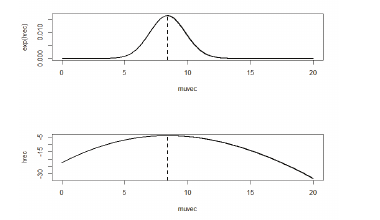

Figure.6 Posterior and log-posterior densities (scaled)


## Solution to Exercise 

Observe that:

$$
f(\mu | D) \propto 1 \times \left( \prod_{i=1}^{k} f(y_i | \mu) \right) \left( \prod_{i=k+1}^{n} P(y_i > c | \mu) \right)
$$

The likelihood function is:

$$
\prod_{i=1}^{k} f(y_i | \mu) \propto \prod_{i=1}^{k} \exp\left(-\frac{(y_i - \mu)^2}{2\sigma^2}\right) = \exp\left( -\frac{1}{2\sigma^2} \sum_{i=1}^{k} (y_i - \mu)^2 \right)
$$

Which simplifies to:

$$
\exp\left(-\frac{1}{2\sigma^2} \left( (k-1) s_o^2 + k (\mu - \bar{y}_o)^2 \right)\right)
$$

where:

$$
\bar{y}_o = \frac{1}{k} \sum_{i=1}^{k} y_i \quad \text{(the observed sample mean)},
$$

$$
s_o^2 = \frac{1}{k-1} \sum_{i=1}^{k} (y_i - \bar{y}_o)^2 \quad \text{(the observed sample variance)}.
$$

Also,

$$
P(y_i > c | \mu) = \int_{c}^{\infty} \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(y_i - \mu)^2}{2\sigma^2}\right) dy_i = 1 - \Phi\left(\frac{c - \mu}{\sigma}\right),
$$

where $ \Phi(z) $ is the CDF of the standard normal distribution.

Thus, the posterior density is proportional to:

$$
f(\mu | D) \propto \exp\left( -\frac{1}{2\sigma^2} k (\mu - \bar{y}_o)^2 \right) \left( 1 - \Phi\left( \frac{c - \mu}{\sigma} \right) \right)^{n - k}.
$$

So the log-posterior is:

$$
\log f(\mu | D) = -\frac{k}{2\sigma^2} (\mu - \bar{y}_o)^2 + (n - k) \log\left( 1 - \Phi\left( \frac{c - \mu}{\sigma} \right) \right) + c_1,
$$

where $ c_1 $ is a constant independent of $ \mu $.

To find the posterior mode of $ \mu $, we solve:

$$
l'(\mu) = 0,
$$

where

$$
l'(\mu) = \frac{\partial}{\partial \mu} \log f(\mu | D).
$$

The derivative is given by:

$$
l'(\mu) = -\frac{k}{\sigma^2} (\mu - \bar{y}_o) + \frac{n-k}{\sigma} \left( -\frac{\phi\left( \frac{c - \mu}{\sigma} \right)}{1 - \Phi\left( \frac{c - \mu}{\sigma} \right)} \right),
$$

where $ \phi(z) $ is the PDF of the standard normal distribution.

This solution could be obtained using the Newton-Raphson algorithm, defined by:

$$
\mu_{j+1} = \mu_j - \frac{l'(\mu_j)}{l''(\mu_j)}.
$$

The second derivative $ l''(\mu) $ is:

$$
l''(\mu) = -\frac{k}{\sigma^2} + \dots
$$

(Note: The posterior mode here is also the maximum likelihood estimate since the prior is proportional to a constant.)


## Augmented Posterior and Log-Augmented Posterior

Given the latent data $ y_m = ( y_{k+1}, \dots, y_n ) $, the augmented posterior is expressed as:

$$
f(\mu | y_o, y_m) \propto 1 \times \left( \prod_{i=1}^{k} f(y_i | \mu) \right) \left( \prod_{i=k+1}^{n} f(y_i | \mu) \right)
$$

$$
\propto \exp\left(-\frac{1}{2\sigma^2} \sum_{i=1}^{k} (y_i - \mu)^2\right) \exp\left(-\frac{1}{2\sigma^2} \sum_{i=k+1}^{n} (y_i - \mu)^2\right)
$$

Thus, the log-augmented posterior is:

$$
\log f(\mu | y_o, y_m) = -\frac{1}{2\sigma^2} \sum_{i=1}^{k} (y_i - \mu)^2 - \frac{1}{2\sigma^2} \sum_{i=k+1}^{n} (y_i - \mu)^2 + c_1
$$

$$
= -\frac{1}{2\sigma^2} \sum_{i=1}^{k} (y_i^2 - 2\mu y_i + \mu^2) - \frac{1}{2\sigma^2} \sum_{i=k+1}^{n} (y_i^2 - 2\mu y_i + \mu^2) + c_1
$$

Simplifying, we get:

$$
= c_2 (k \mu - 2 \mu n y_o) + ((n - k) \mu - 2 \mu (n - k) y_m) + c_3
$$

Where:
- $ y_o = \frac{1}{k} \sum_{i=1}^{k} y_i $ is the sample mean of the observed values,
- $ y_m = \frac{1}{n-k} \sum_{i=k+1}^{n} y_i $ is the sample mean of the missing values.

## Q-function

The Q-function may be expressed as:

$$
Q_j(\mu) = k \mu^2 - 2 \mu k y_o + (n - k) \mu^2 - 2 \mu (n - k) e_j
$$

$$
= 2n\mu^2 - 2\left( k y_o + (n - k) e_j \right)
$$

Where $ e_j = E(y_m | D, \mu_j) = E(y_i | D, \mu_j) $ for $ i > k $.

## Expectation $ e_j $

We know that:

$$
e_j = \mathbb{E}(X | X > c)
$$

Where $ X \sim N(\mu, \sigma^2) $, with $ \mu $ treated as constant.

## Computation of Expectation

$$
\mathbb{E}(X | X > c) = \frac{\int_c^\infty x f(x) dx}{P(X > c)}
$$

Where the probability \( P(X > c) \) is:

$$
P(X > c) = 1 - P(X < c) = 1 - P\left( Z < \frac{c - \mu}{\sigma} \right) = 1 - \Phi\left( \frac{c - \mu}{\sigma} \right)
$$

The integral is given by:

$$
I = \int_c^\infty x e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx
$$

Breaking it down:

$$
I = \int_c^\infty (x - \mu) e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx + \int_c^\infty \mu e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx
$$

Substitute $ t = (x - \mu)^2 $ and $ dt = 2(x - \mu)dx $:

$$
I = \int_{\frac{(c-\mu)^2}{2\sigma^2}}^\infty e^{-\frac{t}{2\sigma^2}} dt + \mu P(X > c)
$$

Thus:

$$
\mathbb{E}(X | X > c) = \frac{\sigma}{P(X > c)} \int_{\frac{(c-\mu)^2}{2\sigma^2}}^\infty e^{-t} dt + \mu
$$


## Augmented Expectation and M-Step

We start by considering the term for $ E(X | X > c) $:

$$
\sigma \left( \frac{1}{P(X > c)} \right) \left[ \int_c^\infty e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx + \mu P(X > c) \right]
$$

This can be written as:

$$
\frac{1}{P(X > c)} \left( \sigma \phi\left( \frac{c-\mu}{\sigma} \right) + \mu P(X > c) \right)
$$

Where $ \phi(z) $ is the standard normal probability density function (PDF).

Thus, we have:

$$
E(X | X > c) = \frac{\sigma \phi\left( \frac{c-\mu}{\sigma} \right) + \mu P(X > c)}{P(X > c)}
$$

Simplifying, this becomes:

$$
E(X | X > c) = \mu + \sigma \frac{\phi\left( \frac{c-\mu}{\sigma} \right)}{1 - \Phi\left( \frac{c-\mu}{\sigma} \right)}
$$

Thus, for $ e_j $, we have:

$$
e_j = \mu_j + \sigma \frac{\phi\left( \frac{c-\mu_j}{\sigma} \right)}{1 - \Phi\left( \frac{c-\mu_j}{\sigma} \right)}
$$

This completes the E-step, which may be summarized by:

$$
Q_j(\mu) = n\mu^2 - 2\mu\left\{k y_o + (n-k)e_j \right\}
$$

### M-Step

The M-step involves calculating the derivative $ Q_j'(\mu) $:

$$
Q_j'(\mu) = 2n\mu - 2\left\{k y_o + (n-k)e_j \right\}
$$

Setting this to zero, we solve for $ \mu_{j+1} $:

$$
\mu_{j+1} = \frac{k y_o + (n-k) e_j}{n}
$$

Substituting the expression for $ e_j $:

$$
\mu_{j+1} = \frac{1}{n} \left[ k y_o + (n-k) \left( \mu_j + \sigma \frac{\phi\left( \frac{c-\mu_j}{\sigma} \right)}{1 - \Phi\left( \frac{c-\mu_j}{\sigma} \right)} \right) \right]
$$


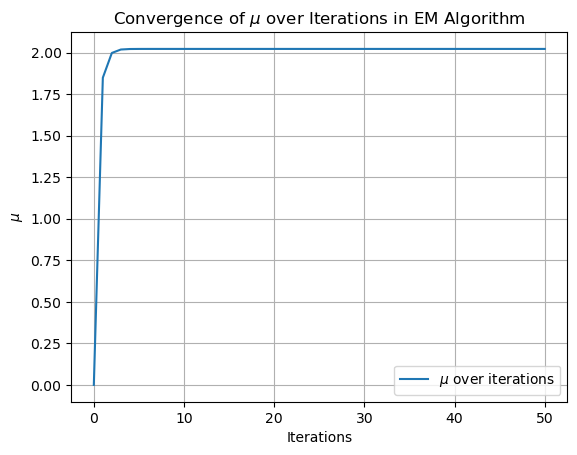

In [3]:
import math
import matplotlib.pyplot as plt

# Define the standard normal pdf (phi) and CDF (Phi)
def phi(z):
    return (1 / math.sqrt(2 * math.pi)) * math.exp(-0.5 * z ** 2)

def Phi(z):
    return 0.5 * (1 + math.erf(z / math.sqrt(2)))

# E-step: Calculate ej
def calculate_ej(mu_j, sigma, c):
    term = (c - mu_j) / sigma
    numerator = sigma * phi(term)
    denominator = 1 - Phi(term)
    return mu_j + numerator / denominator

# M-step: Update mu using Q-function derivative
def update_mu(mu_j, yo, n, k, sigma, c):
    ej = calculate_ej(mu_j, sigma, c)
    return (k * yo + (n - k) * ej) / n

# Parameters
yo = 1.5    # Sample mean of observed values
n = 100     # Total number of data points
k = 60      # Number of observed data points
sigma = 1.0 # Standard deviation
c = 2.0     # Threshold value for missing data
mu_init = 0.0 # Initial guess for mu
iterations = 50 # Number of iterations

# Lists to store values for plotting
mu_values = [mu_init]

# Perform iterations for the EM algorithm
mu_j = mu_init
for i in range(iterations):
    mu_j = update_mu(mu_j, yo, n, k, sigma, c)
    mu_values.append(mu_j)

# Plotting the convergence of mu over iterations
plt.plot(mu_values, label=r'$\mu$ over iterations')
plt.xlabel('Iterations')
plt.ylabel(r'$\mu$')
plt.title(r'Convergence of $\mu$ over Iterations in EM Algorithm')
plt.legend()
plt.grid(True)
plt.show()


E(X | X > 6): 6.52513527616098
Updated mu (mu_j+1): 5.5125676380804896


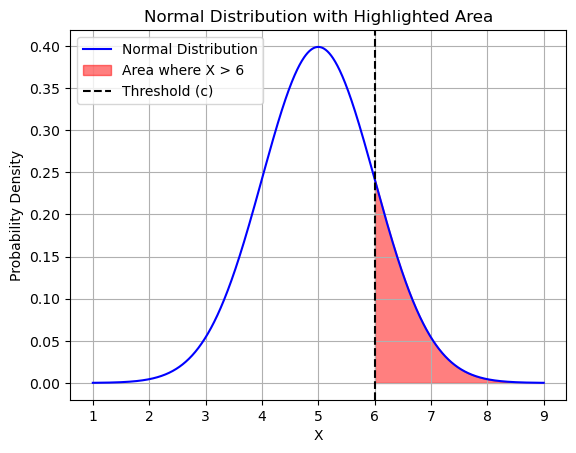

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu_j = 5  # Current estimate of mu
sigma = 1  # Standard deviation
k = 10  # Number of observed values
n = 20  # Total number of values
c = 6  # Threshold for X

# Function to compute E(X | X > c)
def E_X_given_X_greater_than_c(mu, sigma, c):
    # Calculate P(X > c)
    P_X_greater_than_c = 1 - norm.cdf(c, mu, sigma)
    # Calculate phi(c)
    phi_c = norm.pdf(c, mu, sigma)

    # E(X | X > c) calculation
    E_X = (sigma * phi_c + mu * P_X_greater_than_c) / P_X_greater_than_c
    return E_X

# E-step
e_j = E_X_given_X_greater_than_c(mu_j, sigma, c)

# Calculate Q_j(mu)
def Q_j(mu, k, y_o, e_j, n):
    return n * mu**2 - 2 * mu * (k * y_o + (n - k) * e_j)

# Function to calculate Q_j' and solve for mu_{j+1}
def M_step(k, y_o, e_j, n):
    # Calculate the derivative Q_j' at mu
    mu = (k * y_o + (n - k) * e_j) / n
    return mu

# Assume y_o (sample mean of observed values)
y_o = 4.5  # Example value, can be computed from actual data

# M-step to update mu
mu_j_plus_1 = M_step(k, y_o, e_j, n)

# Print the results
print(f"E(X | X > {c}): {e_j}")
print(f"Updated mu (mu_j+1): {mu_j_plus_1}")

# Optional: Plotting the normal distribution and highlighting the area for X > c
x = np.linspace(mu_j - 4*sigma, mu_j + 4*sigma, 1000)
y = norm.pdf(x, mu_j, sigma)

plt.plot(x, y, label='Normal Distribution', color='blue')
plt.fill_between(x, y, where=(x > c), color='red', alpha=0.5, label=f'Area where X > {c}')
plt.axvline(c, color='black', linestyle='--', label='Threshold (c)')
plt.title('Normal Distribution with Highlighted Area')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()


E(X | X > 6): 6.52513527616098
Log-Augmented Posterior: 243.75
Q-function: 779.4972944767804


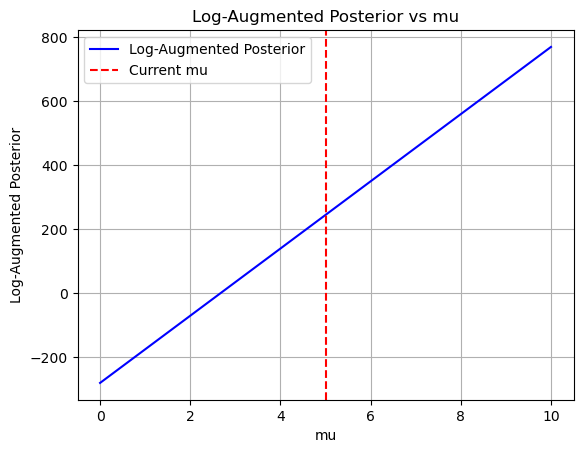

In [6]:
# Augmented processor

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
mu = 5  # Current estimate of mu
sigma = 1  # Standard deviation
y_o = 4.5  # Sample mean of the observed values
y_m = 6.0  # Sample mean of the missing values
k = 10  # Number of observed values
n = 20  # Total number of values
c = 6  # Threshold for X

# Function to compute the log-augmented posterior
def log_augmented_posterior(mu, y_o, y_m, sigma, k, n):
    term1 = -1 / (2 * sigma ** 2) * (k * (y_o ** 2) - 2 * mu * k * y_o)
    term2 = -1 / (2 * sigma ** 2) * ((n - k) * (y_m ** 2) - 2 * mu * (n - k) * y_m)
    return term1 + term2 + np.log(1)  # c1 = log(1) is a constant term

# Function to compute the Q-function
def Q_function(mu, y_o, e_j, k, n):
    return 2 * n * mu ** 2 - 2 * (k * y_o + (n - k) * e_j)

# Function to compute E(X | X > c)
def E_X_given_X_greater_than_c(mu, sigma, c):
    # Calculate P(X > c)
    P_X_greater_than_c = 1 - norm.cdf(c, mu, sigma)
    # Calculate phi(c)
    phi_c = norm.pdf(c, mu, sigma)

    # Compute the integral
    integral_term = (sigma * phi_c + mu * P_X_greater_than_c) / P_X_greater_than_c
    return integral_term

# Function to compute the integral I
def integral_I(mu, sigma, c):
    # Transform variable
    lower_limit = (c - mu) ** 2 / (2 * sigma ** 2)
    integral_value = sigma * norm.pdf(c, mu, sigma) + mu * (1 - norm.cdf(c, mu, sigma))
    return integral_value

# Compute expectation e_j
e_j = E_X_given_X_greater_than_c(mu, sigma, c)

# Calculate log-augmented posterior
log_posterior = log_augmented_posterior(mu, y_o, y_m, sigma, k, n)

# Calculate Q function
Q_val = Q_function(mu, y_o, e_j, k, n)

# Print the results
print(f"E(X | X > {c}): {e_j}")
print(f"Log-Augmented Posterior: {log_posterior}")
print(f"Q-function: {Q_val}")

# Optional: Visualizing the log-augmented posterior
mu_values = np.linspace(0, 10, 100)
log_posteriors = [log_augmented_posterior(mu_val, y_o, y_m, sigma, k, n) for mu_val in mu_values]

plt.plot(mu_values, log_posteriors, label='Log-Augmented Posterior', color='blue')
plt.title('Log-Augmented Posterior vs mu')
plt.xlabel('mu')
plt.ylabel('Log-Augmented Posterior')
plt.axvline(mu, color='red', linestyle='--', label='Current mu')
plt.legend()
plt.grid()
plt.show()
